<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week11_2_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5장 합성곱 신경망 I**

### **5.1** 합성곱 신경망

- 합성곱 신경망: 이미지 전체를 한 번에 계산하는 것이 아니라 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망

##### **5.1.1 합성곱층의 필요성**

- 이미지 분석은 배열을 펼쳐서(flattening) 각 픽셀에 가중치를 곱하여 은닉층으로 전달
- 이미지를 펼쳐서 분석하면 데이터의 공간적 구조 무시 => 방지하고자 '합성곱층' 도입

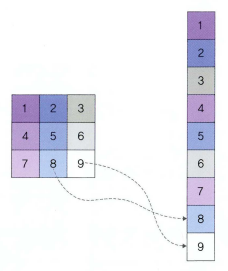

##### **5.1.2 합성곱 신경망 구조**

- 합성곱 신경망(Convolutional Neural Network. CNN/ConvNet): 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망
- 다차원 배열 데이터를 처리하도록 구성 (컬러 이미지에 특화)
  1. 입력층
  2. 합성곱층
  3. 풀링층
  4. 완전연결층
  5. 출력층

  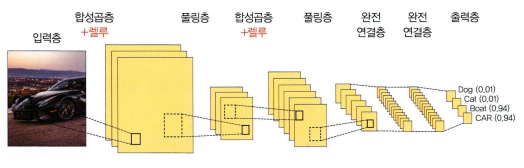
  - 합성곱층-풀링층 거치면서 입력 이미지의 주요 특성 벡터(feature vector) 추출
  - 추출된 주요 특성 벡터들은 완전연결층 거치면서 1차원 벡터로 변환
  - 출력층에서 활성화 함수 소프트맥스(softmax) 함수 사용하여 최종 결과 출력



> **입력층**(input layer)
- 입력 이미지 데이터가 최초로 거치게 되는 계층
- 이미지는 높이(height), 너비(width), 채널(channel) 값을 갖는 3차원 데이터
  - 높이 4, 너비 4, 채널 RGB: (4, 4, 3)
  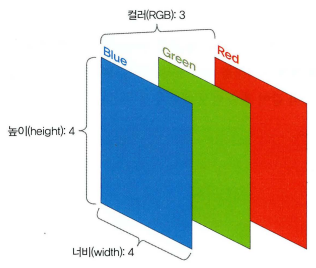





> **합성곱층**(convolutional layer)
- 입력 데이터에서 특성을 추출
- 이미지에 대한 특성을 감지하기 위해 커널(kernel)/필터 사용 => 이미지 모든 영역 훑음 => 맵(feature map)
- 커널 3x3, 5x5 크기로 적용 (일반적)
- 스트라이드(stride)라는 지정된 간격에 따라 순차적으로 이동
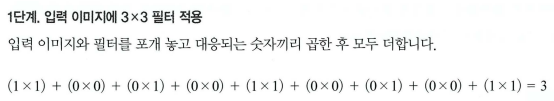
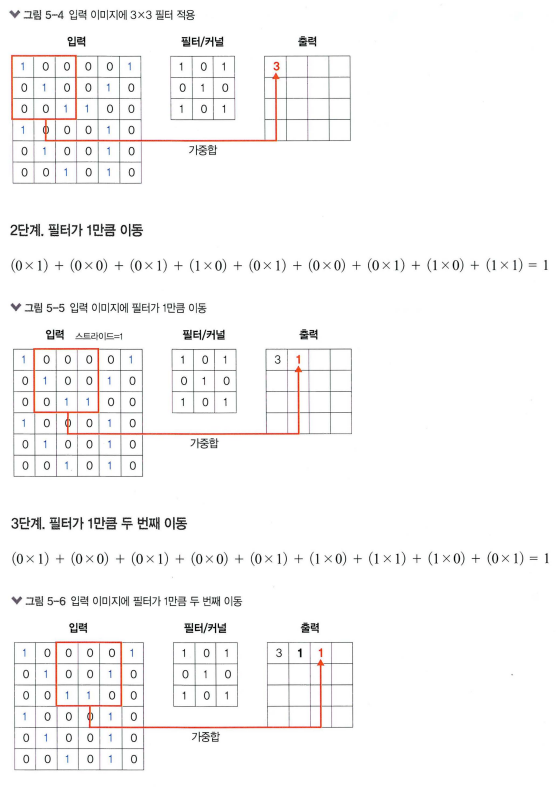
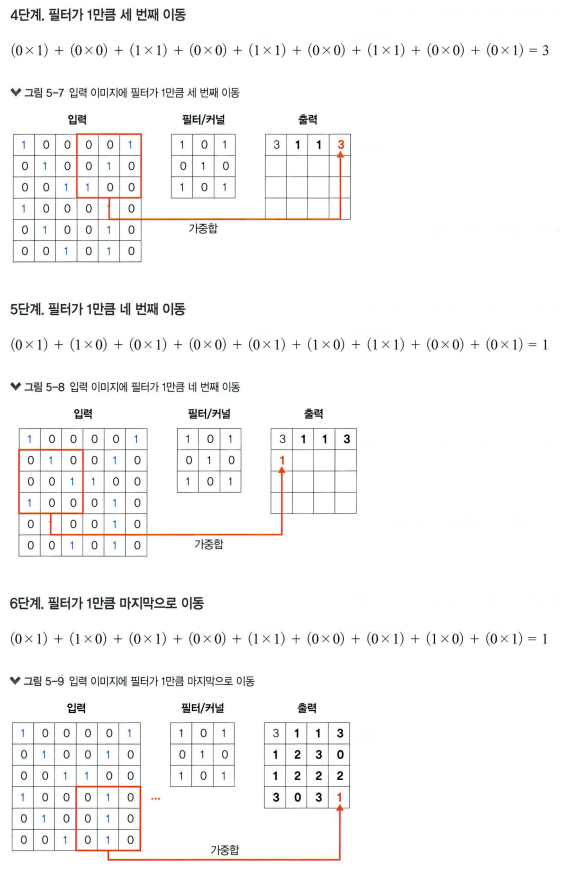
  - 이미지 (6, 6, 1), 3x3 크기의 커널/필터가 스트라이드 1 간격으로 이동하면서 합성곱 연산 수행
  - 커널 스트라이드 간격만큼 순회하면서 모든 입력 값과의 합성곱 연산으로 새로운 특성 맵 만듦
  - 특성 맵 원본 (6, 6, 1) ⭢ (4, 4, 1)

**컬러 이미지 합성곱**

- 필터 채널이 3
- RGB 각각에 서로 다른 가중치로 합성곱 적용 후 결과를 더함
- 필터 채널이 3이라도 필터 개수는 한 개

  - 필터 개수 한 개인 합성곱
  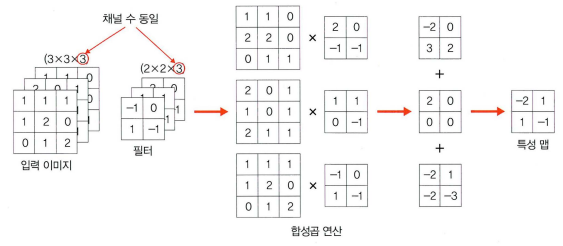

  - 필터 2 이상인 합성곱

  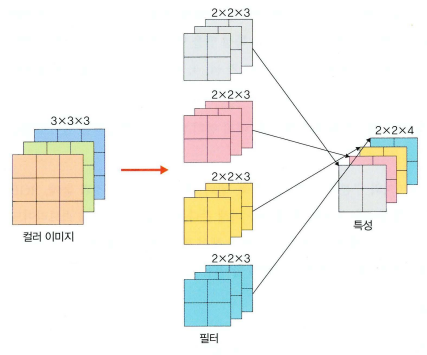

**합성곱층 요약**
- 입력 데이터: $W_1$x$H_1$x$D_1$($W_1$:가로, x$H_1$: 세로, x$D_1$: 채널 또는 깊이)
- 하이퍼파라미터
  - 필터 개수: $K$
  - 필터 크기: $F$
  - 스트라이드: $S$
  - 패딩: $P$
- 출력 데이터
  - $W_2$ = ($W_1-F+2P/S+1$)
  - $H_2$ = ($H_1-F+2P/S+1$)
  - $D_2=K$



> **풀링층**(pooling layer)
- 합성곱층과 유사, 특성 맵의 차원을 다운 샘플링하여 연산량을 감소
- 주요한 특성 벡터를 추출하여 학습을 효과적으로 수행
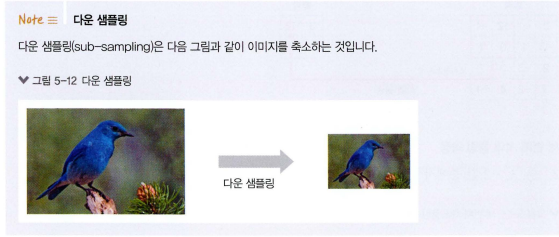
  - **최대 풀링(max pooling)**: 대상 영역에서 최댓값을 추출
  - **평균 풀링(average pooling)**: 대상 영역에서 평균을 반환

**최대 풀링 연산 과정**

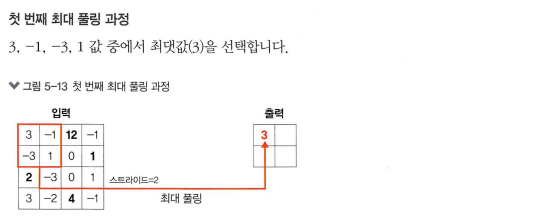
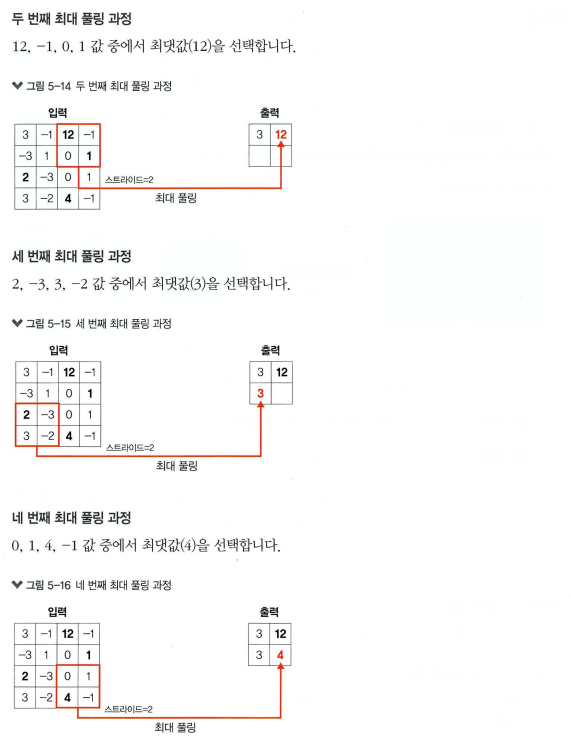

- 평균 풀링 계산 과정은 최대 풀링과 유사한 방식으로 진행 => 각 필터의 평균으로 계산
  - 최대 풀링과 평균 풀링 비교
  
  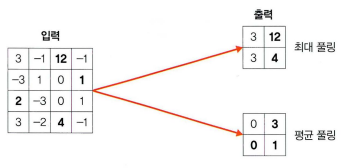

**최대 풀링, 평균 풀링 요약**
- 입력 데이터: $W_1$x$H_1$x$D_1$
- 하이퍼파라미터
  - 필터 크기: $F$
  - 스트라이드: $S$
- 출력 데이터
  - $W_2$ = ($W_1-F)/S+1$
  - $H_2$ = ($H_1-F)/S+1$
  - $D_2=D_1$



> **완전연결층**()
- 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달
- 3차원 벡터 이미지 => 1차원 벡터
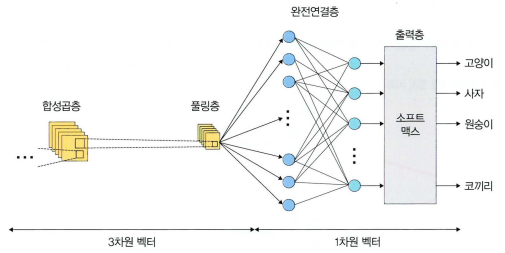



> **출력층**(output layer)
- 소프트맥스 활성화 함수 사용, 입력받은 값을 0~1 사이의 값으로 출력
- 마지막 출력층의 소프트맥스 함수를 사용하여 이미지가 각 레이블에 속할 확률 값이 출력
- 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정


##### **5.1.3 1D, 2D, 3D 합성곱**

- 이동하는 방향의 수, 출력 형태에 따라 1D, 2D, 3D 분류



> **1D 합성곱**
- 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱
- 입력(W), 필터(k)에 대한 출력은 W
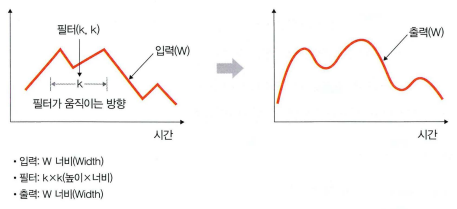




> **2D 합성곱**
- 필터가 방향 두 개로 움직이는 형태
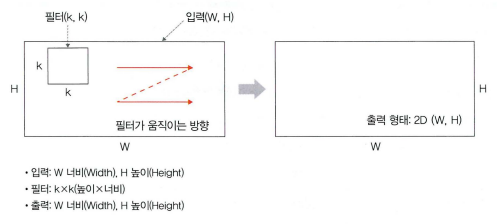




> **3D 합성곱**
- 필터가 움직이는 방향 세 개
- (W, H, L) => 필터 (k, k, d) => (W, H, L)
- 출력은 d < L 유지
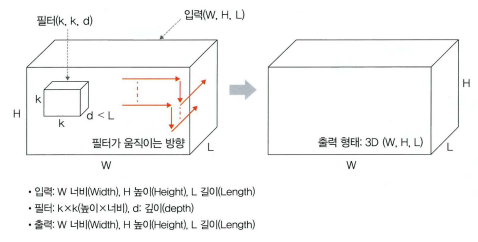



> **3D 입력을 갖는 2D 합성곱**
- 입력이 3D 형태임에도 출력 형태가 2D 행렬을 취함
- 필터에 대한 길이(L)가 입력 채널의 길이(L)와 같아야 하기 때문
- 필터는 두 방향으로 움직이며 출력 형태는 2D 행렬
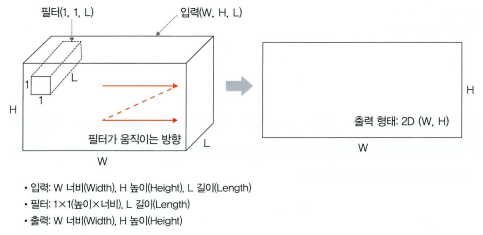



> **1x1 합성곱**
- 3D 형태로 입력
- (W, H, L) => 필터 (1, 1, L) => (W, H)
- 채널 수를 조정해 연산량이 감소되는 효과 (ex. GoogLeNet)
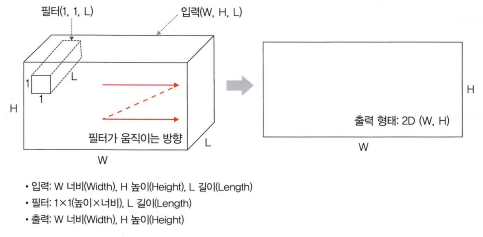